# HW 11 - Last Random Stuff 

## Jake Richter

10.9 and 10.11 were the only ones where I was not able to get a proper animation. I tried with both but only got close on the 10.11. As you will see later, the 10.11 was difficult because of the method I used doesn't work well with artist animation or function animation because the list is so big 

---

## Newman 10.8 

In [2]:
'''
Find the value of the integeral 

x^(-1/2)/(exp(x) + 1) from 0 to 1 by using the correct distribution of random numbers for your sampling 
because this integarl will diverge. 

'''


import numpy as np 
import matplotlib.pyplot as plt 


def MonteIntegrated(Npoints):
    I = 0.0 
    for i in range(Npoints):

        x = np.random.random()
        I += 2/(np.exp(x**2) + 1)
    I *=(1/Npoints)

    print(I)
MonteIntegrated(1000000)

0.838960843370648


---

## Newman 8.9 

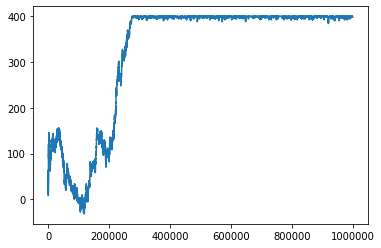

In [3]:
'''

Ising Model - 
Use a markov - monte carlo simulation to calculate the physics of the ising model

'''

# Part A - Energy Calcualtion 
import numpy as np 
import matplotlib.pyplot as plt 

class Spins: 
    def __init__(self,size):
        self.size = size 
        self.Smatrix = np.ones([size,size], dtype = int)
        self.TotalE  = 0.0 
        
        # Randomizing the +1 and -1 spins
        for i in range(len(self.Smatrix)):
            for j in range(len(self.Smatrix)):
                if np.random.random()>.5:
                    self.Smatrix[i][j] = - 1 
    
    def Energy(self):
        self.TotalE = 0.0 
        for col in range(len(self.Smatrix )-1):
            self.TotalE += np.sum(self.Smatrix[:,col] * self.Smatrix[:,col+1]) 
            self.TotalE += np.sum(self.Smatrix[col,:] * self.Smatrix[col + 1,:])
        return -1 * self.TotalE

    
    def Mag(self):
         
        M = np.sum(self.Smatrix)
        

        return M 

    def SpinFlipping(self, Npoints, plot):
        M_list = []
        # Energy before spin flip
        ei = self.Energy()
        for N in range(Npoints):
            

            # Random Element in Array of spins
            si = np.random.randint(low = 0.0 ,high = self.size )
            sj = np.random.randint(low = 0.0, high = self.size)
            
            # Changing the Direction of that spin 
            self.Smatrix[si][sj] *= -1 

            # Energy After the each spin flip 
            Ej = self.Energy()

            # The probability value 
            Pa = np.exp(-1*(Ej - ei))

            if Pa > np.random.random() :
                M_list.append(self.Mag())
                ei = Ej
                continue
            elif Ej <= ei:
                M_list.append(self.Mag())
                ei = Ej
                continue 
            else:
                self.Smatrix[si][sj] *= -1
                M_list.append(self.Mag()) 

            
                
            
            
        if plot == True: 
            plt.figure()
            plt.plot(np.arange(Npoints), M_list)
            plt.show()
    
        

        




s = Spins(20)
s.SpinFlipping(1000000, plot = True)





Here we see the spontaneous Magnetization 
sometimes it varies a bit beforehand


---

## Newman 10. 11

### I couldn't get it to animate properly because I used the mc.linecollections and that makes it hard on the animator artists and the ffmpeg


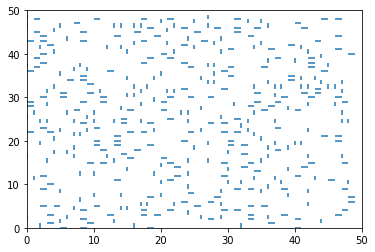

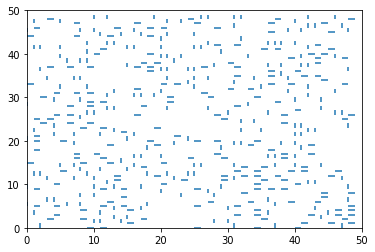

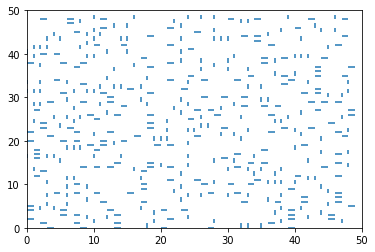

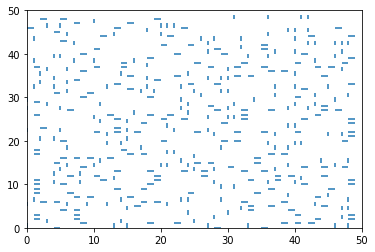

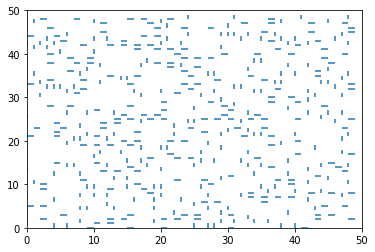

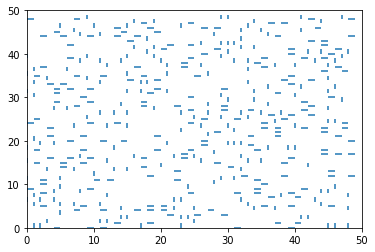

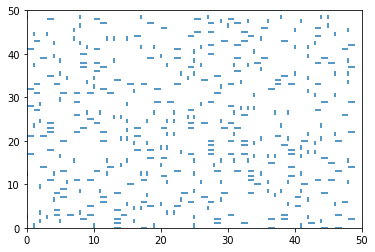

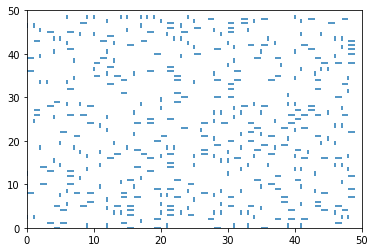

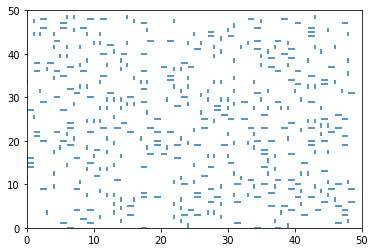

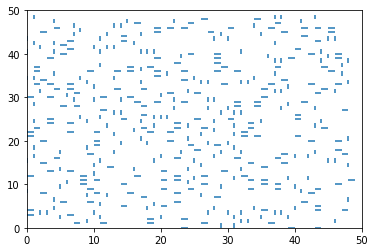

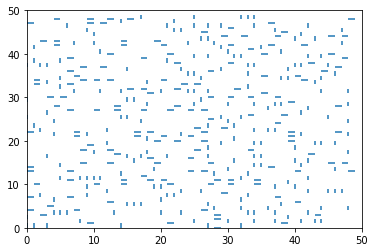

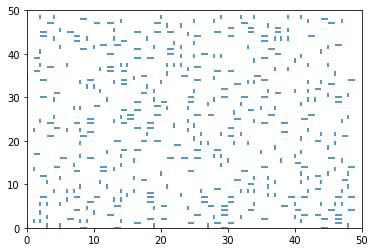

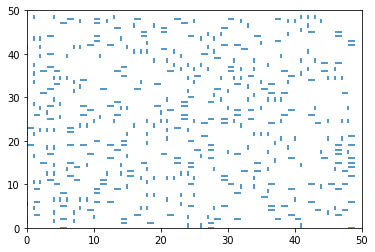

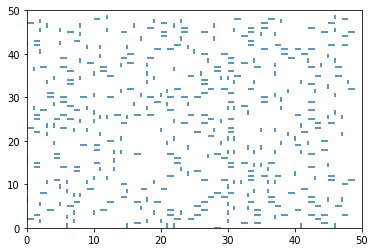

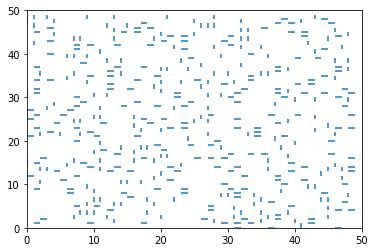

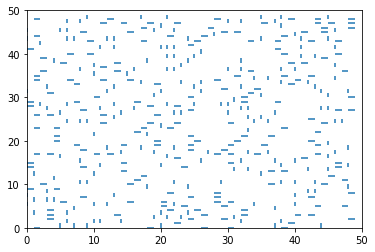

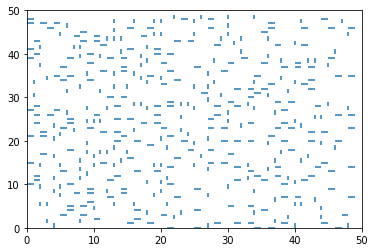

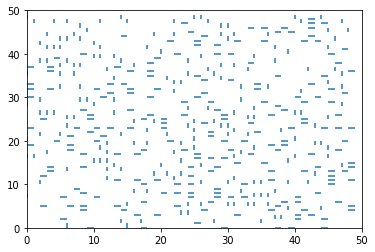

"\nHow I would have animated it \nNewman10_11Animation = animation.ArtistAnimation(fig, imgs, interval = 10, blit = True )\n\nFFwriter = animation.FFMpegWriter(fps = 60) \nNewman10_11Animation.save('Newman10_11.mp4', writer = FFwriter)\nplt.show()\n"

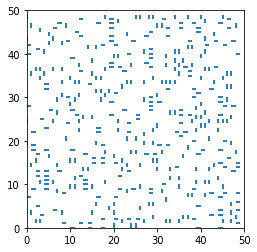

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import collections  as mc
import matplotlib.animation as animation
plt.rcParams['animation.ffmpeg_path'] ='C:\\Users\\jakri\\Programs\\Python\\Python38\\Lib\\site-packages\\ffmpeg\\ffmpeg-20200403-52523b6-win64-static\\bin\\ffmpeg.exe'

'''
Nl = 50 

# Initialize random dimer as a list because it will make the collection easier 
# Nl - 1 so we don't have to worry about a boundary 
dimx1 = np.random.randint(Nl - 1)
dimy1 = np.random.randint(Nl - 1)

dimer = [[dimx1, 0.0 ],[dimy1, 0.0]]

randtester = np.random.random()
print(dimer)
'''






def dimerComplete():
    Nl = 50
    dimx1 = np.random.randint(Nl - 1)
    dimy1 = np.random.randint(Nl - 1)

    dimer = [[dimx1 , dimy1 ],[0.0, 0.0]]

    randtester = np.random.random()
    

    # Completing the random dimer 
    if randtester < .25: 
        dimer[1][0] = dimx1 + 1
        dimer[1][1] = dimy1
    elif randtester <.5 :
        dimer[1][0] = dimx1 - 1 
        dimer[1][1] = dimy1
    elif randtester <.75: 
        dimer[1][1] = dimy1 + 1
        dimer[1][0] = dimx1
    elif randtester <1:
        dimer[1][1] = dimy1 - 1 
        dimer[1][0] = dimx1 


    return dimer
def Energy_calculation(list_object):
    return -len(list_object)

def iteration(nsteps):
    
    # Intializing list for dimer objects, with the first dimer (di - dimer itial)
    di = dimerComplete()
    dList = [di]
    # Initializing temperature variables
    T = Tmax = 10 
    tmin = 1e-3
    tau = 1e4 
    t = 0.0 
    # Initializing the energy calculation 
    ei = Energy_calculation(dList)

    # Artists list 
    Artists = []

    # Main loop 

    while T > tmin:
        t += 1
        T = Tmax * np.exp(-t/tau)
        dtempor = dimerComplete()
        
        # Test to see if the new dimer will overlap 
        for index,ddex in enumerate(dList):
            
            # if it does overlap - then run a monte carlo random number and see if it should be removed
            
            if dtempor == ddex:
                # Testing the energy difference 
                testD = dList
                testD.pop(index)


                ej = Energy_calculation(testD)
                deltaE = ej - ei 


                if np.random.random() <= np.exp(-deltaE/T):
                    dList = testD
                    ei = ej 
                    break
                else:
                    break
            
                    
            # Checking for individual 
            if (dtempor[0] == ddex[0]) or (dtempor[0] == ddex[1]) or (dtempor[1] == ddex[1]) or (dtempor[1] == ddex[0]) :
                dList.pop(index)
                break
                
            
            # if gets to the end with no overlap then we add it to the list of dimers
            elif index == len(dList) - 1:
                dList.append(dtempor)
                ei = Energy_calculation(dList)
                break

        
        
        if t%5000 == 0.0 :
            
            fig,ax = plt.subplots()
            draw_Dimers = mc.LineCollection(dList)
            ax.add_collection(draw_Dimers)
            ax.set_xlim(0,50)
            ax.set_ylim(0,50)
            plt.show()
        
        
    return dList

imgs = iteration(1)


fig, ax = plt.subplots()
draw_Dimers = mc.LineCollection(imgs)
ax.add_collection(draw_Dimers)

ax.add_collection(draw_Dimers)
ax.set_xlim(0,50)
ax.set_ylim(0,50)
ax.set_aspect('equal')


'''
How I would have animated it 
Newman10_11Animation = animation.ArtistAnimation(fig, imgs, interval = 10, blit = True )

FFwriter = animation.FFMpegWriter(fps = 60) 
Newman10_11Animation.save('Newman10_11.mp4', writer = FFwriter)
plt.show()
'''




---

## Newman 10.12

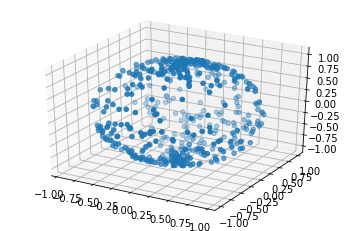

In [17]:
'''
Newman Problem 10.12 

'''
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Part c 

theta = np.arccos(np.random.uniform(low = -1, high = 1))
phi = 2*np.pi * np.random.uniform(low = 0, high = 1)

# Part D 
thetaList = []
phiList = []

for i in range(500):
    theta = np.arccos(np.random.uniform(low = -1, high = 1))
    phi = 2*np.pi * np.random.uniform(low = 0, high = 1)
    thetaList.append(theta)
    phiList.append(phi)

phiList = np.array(phiList)
thetaList = np.array(thetaList)

x = np.sin(phiList) * np.cos(thetaList)
y = np.sin(phiList) * np.sin(thetaList)
z = np.cos(phiList)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs = x, ys = y, zs = z)
plt.show()

![alt text](Newman_10_12.png "Title")